<a href="https://colab.research.google.com/github/Lakshmana219/ML-Work/blob/master/COVID_19_CaseStaudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install pycountry-convert

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta, date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests


%matplotlib inline

Downloading COVID-19 Datasets

In [0]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Depricated
# df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [4]:
df_covid19.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [5]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

###Pre-Processing

In [0]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state", "Country/Region":"country"})

In [7]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20'],
      dtype='object')

In [0]:
df_deaths = df_deaths.rename(columns={"Province/State":"state", "Country/Region":"country"})

In [9]:
df_covid19.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [0]:
df_covid19 = df_covid19.rename(columns={"Country_Region":"country"})

In [0]:
# Active = Confirmed - Recovered - Deaths
df_covid19['Active'] = df_covid19['Confirmed'] - df_covid19['Recovered'] - df_covid19['Deaths']

In [12]:
df_covid19.columns

Index(['country', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [0]:
df_confirmed["country"].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [0]:
df_deaths['country'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [0]:
df_covid19['country'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [0]:
df_table['Country_Region'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [0]:
# Getting all countries
countries = np.asarray(df_confirmed['country'])
countries1 = np.asarray(df_covid19['country'])

Continents_code to Continent_name

In [0]:
continents = {
    'NA' : "North America",
    "SA" : "South America",
    "AS" : "Asia",
    "OC" : "Australia",
    "AF" : "Africa",
    "EU" : "Europe",
    "na" : "Others"
}

Defining Function for getting continent code for country

In [0]:
def country_to_continent_code(country):
  try:
    return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
  except:
    return 'na'

Collecting Continent Information

In [0]:
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])

In [0]:
df_table = df_table[df_table['continent'] != "Others"]

In [25]:
df_deaths['continent'][df_deaths['continent'] == "Others"]

88     Others
127    Others
143    Others
236    Others
241    Others
247    Others
248    Others
252    Others
261    Others
Name: continent, dtype: object

In [0]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [27]:
#print(np.sum(np.asarray(df_deaths.iloc[:,5:])))
#print(np.sum(np.asarray(df_deaths.iloc[:,5:]), axis = 0)[-1])
np.sum(df_deaths.iloc[:,5:])

1/22/20       17
1/23/20       18
1/24/20       26
1/25/20       42
1/26/20       56
           ...  
4/1/20     46809
4/2/20     52983
4/3/20     58787
4/4/20     64606
4/5/20     69374
Length: 75, dtype: int64

In [0]:
# Get Total Cases
def get_total_cases(cases, country = 'All'):
  if(country == 'All'):
    return np.sum(np.asarray(case.iloc[:,5:]), axis=0)[-1]
  else:
    return np.sum(np.asarray(cases[cases['country'] == country].iloc[:,5:]), axis=0)[-1]

### General Analysis of Data

Getting country wise and continent wise data

In [0]:
df_countries_cases = df_covid19.copy().drop(['Lat', 'Long_', 'continent', 'Last_Update'], axis=1)

In [0]:
df_countries_cases.index = df_countries_cases['country']

In [0]:
df_countries_cases = df_countries_cases.drop(['country'], axis=1)

In [0]:
df_continents_cases = df_covid19.copy().drop(['Lat', 'Long_', 'country', 'Last_Update'], axis=1)

In [0]:
df_continents_cases = df_continents_cases.groupby(['continent']).sum()

In [34]:
df_continents_cases

,Confirmed,Deaths,Recovered,Active
continent,,,,
Africa,9456,448,919,8089
Asia,218528,8637,109539,100352
Australia,6919,41,1256,5622
Europe,656579,50147,127643,478789
North America,361778,10247,21537,329994
Others,11435,202,7265,3968
South America,25787,905,2417,22465


Global Reported Cases till Date

Total number of confirmed cases, deaths reported, revoveries and active cases all across the world

In [35]:
df_countries_cases.sum()

Confirmed    1290482
Deaths         70627
Recovered     270576
Active        949279
dtype: int64

In [36]:
pd.DataFrame(df_countries_cases.sum()).transpose().style.background_gradient(cmap='Wistia', axis=1)

,Confirmed,Deaths,Recovered,Active
0,1290482,70627,270576,949279


### Coninent Wise Reported Cases

Coninent Wise reported confirmed cases, recovered cases, deaths, active cases

In [37]:
df_continents_cases

,Confirmed,Deaths,Recovered,Active
continent,,,,
Africa,9456,448,919,8089
Asia,218528,8637,109539,100352
Australia,6919,41,1256,5622
Europe,656579,50147,127643,478789
North America,361778,10247,21537,329994
Others,11435,202,7265,3968
South America,25787,905,2417,22465


In [38]:
df_continents_cases.style.background_gradient(cmap='Wistia')

,Confirmed,Deaths,Recovered,Active
continent,,,,
Africa,9456,448,919,8089
Asia,218528,8637,109539,100352
Australia,6919,41,1256,5622
Europe,656579,50147,127643,478789
North America,361778,10247,21537,329994
Others,11435,202,7265,3968
South America,25787,905,2417,22465


### Country Wise Reported Cases

Country Wise reported confirmed cases, recovered cases, deaths, active cases

In [39]:
df_countries_cases

,Confirmed,Deaths,Recovered,Active
country,,,,
Australia,5797,40,1080,4677
Austria,12236,220,3463,8553
Canada,15940,281,3081,12578
China,82665,3335,77310,2020
Denmark,4841,187,1488,3166
...,...,...,...,...
Vietnam,245,0,95,150
West Bank and Gaza,252,1,25,226
Western Sahara,4,0,0,4


In [40]:
df_countries_cases.sort_values('Confirmed', ascending=False).style.background_gradient(cmap='Wistia')

,Confirmed,Deaths,Recovered,Active
country,,,,
USA,338399,9678,17717,311004
Spain,135032,13055,40437,81540
Italy,128948,15887,21815,91246
Germany,100315,1597,28700,70018
France,93780,8093,16354,69333
China,82665,3335,77310,2020
Iran,60500,3739,24236,32525
United Kingdom,48451,4943,229,43279
Turkey,27069,574,1042,25453


###Top 10 countries (Confirmed Cases)

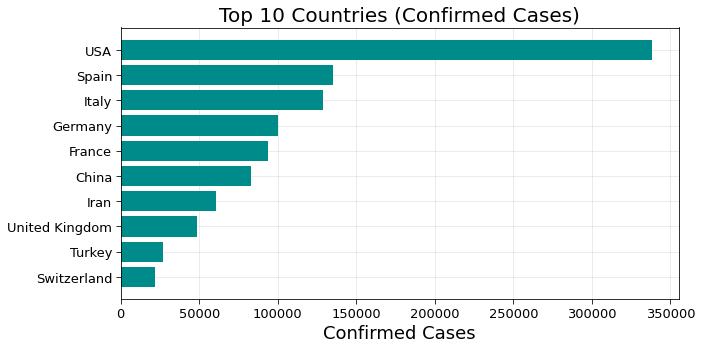

In [41]:
f = plt.figure(figsize=(10, 5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')['Confirmed'].index[-10:], df_countries_cases.sort_values('Confirmed')['Confirmed'].values[-10:], color='darkcyan')
plt.tick_params(size=5, labelsize=13)
plt.xlabel("Confirmed Cases", fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)", fontsize=20)
plt.grid(alpha=0.3)

### Top 10 Countries (Deaths Cases)

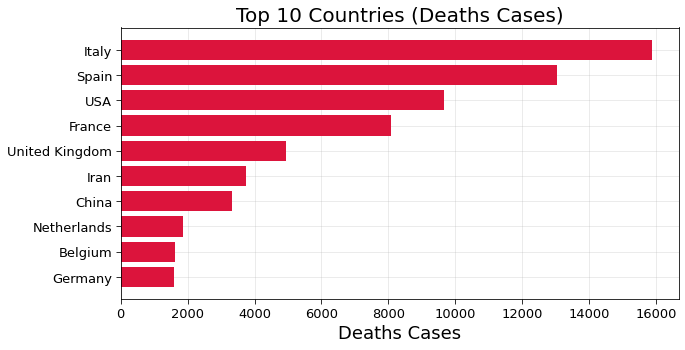

In [47]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values("Deaths")['Deaths'].index[-10:],df_countries_cases.sort_values("Deaths")['Deaths'].values[-10:],color='crimson')
plt.tick_params(size=5, labelsize=13)
plt.xlabel("Deaths Cases", fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)", fontsize=20)
plt.grid(alpha=0.3, which='both')

### Top 10 Countries (Active Cases)

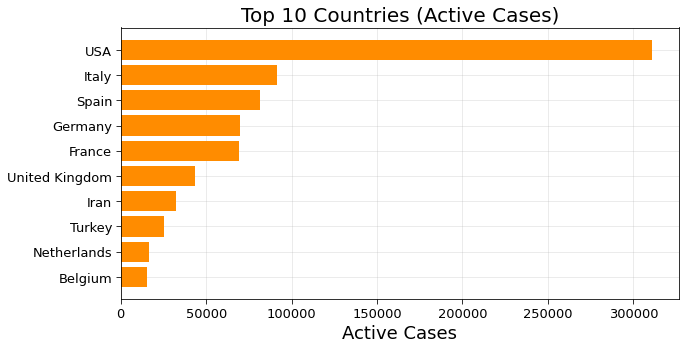

In [48]:
f = plt.figure(figsize=(10, 5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values("Active")['Active'].index[-10:], df_countries_cases.sort_values('Active')['Active'].values[-10:], color='darkorange')
plt.tick_params(size=5, labelsize=13)
plt.xlabel("Active Cases", fontsize=18)
plt.title("Top 10 Countries (Active Cases)", fontsize=20)
plt.grid(alpha=0.3, which='both')


### Top 10 Countries (Recovered Cases)

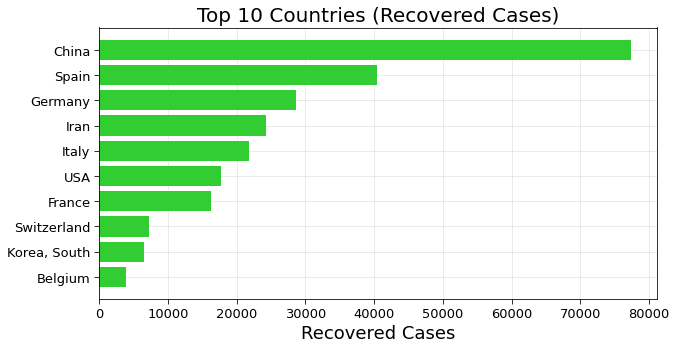

In [49]:
f = plt.figure(figsize=(10, 5))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')['Recovered'].index[-10:], df_countries_cases.sort_values('Recovered')['Recovered'].values[-10:],color='limegreen')
plt.tick_params(size=5, labelsize=13)
plt.xlabel("Recovered Cases", fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3, which='both')

### World Map

In [45]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

In [46]:
df_data = df_table.groupby(['Last_Update', 'Country_Region'])['Confirmed', 'Deaths'].max().reset_index()
df_data["Last_Update"] = pd.to_datetime( df_data["Last_Update"]).dt.strftime('%m/%d/%Y')

fig = px.scatter_geo(df_data, locations="Country_Region", locationmode='country names', 
                     color=np.power(df_data["Confirmed"],0.3)-2 , size= np.power(df_data["Confirmed"]+1,0.3)-1, hover_name="Country_Region",
                     hover_data=["Confirmed"],
                     range_color= [0, max(np.power(df_data["Confirmed"],0.3))], 
                     projection="natural earth", animation_frame="Last_Update", 
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='COVID-19: Progression of spread'
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

